In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/cap_manu/input/40_varieties_final_quant.csv')
df

,row ID,row m/z,row retention time,row ion mobility,row ion mobility unit,row CCS,correlation group ID,annotation network number,best ion,auto MS2 verify,...,20221121_86_S38_ACN_1uL.mzML Peak area,20221121_44_S17_ACN_1uL.mzML Peak area,20221121_64_S27_ACN_1uL.mzML Peak area,20221121_82_S36_ACN_1uL.mzML Peak area,20221121_66_S28_ACN_1uL.mzML Peak area,20221121_70_S30_ACN_1uL.mzML Peak area,20221121_76_S33_ACN_1uL.mzML Peak area,20221121_84_S37_ACN_1uL.mzML Peak area,20221121_88_S39_ACN_1uL.mzML Peak area,Unnamed: 53
0,1,151.035135,0.870653,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0.0000,0.0,0.0,0.0,0.0,52062.906,0.000,0.0,0.0,NaN
1,2,100.011103,0.879128,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0.0000,0.0,0.0,0.0,0.0,99639.660,0.000,0.0,0.0,NaN
2,3,162.967343,0.880178,NaN,NaN,NaN,1.0,23.0,[M-H2O+Na]+,NaN,...,0.0000,0.0,0.0,0.0,0.0,286923.750,0.000,0.0,0.0,NaN
3,4,140.985701,0.880907,NaN,NaN,NaN,1.0,23.0,[M-H2O+H]+,NaN,...,0.0000,0.0,0.0,0.0,0.0,235407.160,0.000,0.0,0.0,NaN
4,5,134.972436,0.881063,NaN,NaN,NaN,1.0,20.0,[M+Na]+,NaN,...,0.0000,0.0,0.0,0.0,0.0,92717.914,0.000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1526,676.551327,17.221300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,NaN
1526,1527,648.483470,17.221409,NaN,NaN,NaN,254.0,621.0,[M+Ethylamine]+,NaN,...,5559.3794,0.0,0.0,0.0,0.0,0.000,55911.277,0.0,0.0,NaN
1527,1528,934.640389,17.236145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,NaN
1528,1529,393.297867,17.250332,NaN,NaN,NaN,185.0,622.0,[M+Na]+,NaN,...,0.0000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,NaN


In [4]:
# Define the columns corresonding to experiments
exp_cols = [c for c in df.columns if '.mzML' in c]
df_exp_bool = df[exp_cols].astype(bool)
df_exp_bool

,20221121_12_S1_ACN_1uL.mzML Peak area,20221121_24_S7_ACN_1uL.mzML Peak area,20221121_18_S4_ACN_1uL.mzML Peak area,20221121_30_S10_ACN_1uL.mzML Peak area,20221121_16_S3_ACN_1uL.mzML Peak area,20221121_14_S2_ACN_1uL.mzML Peak area,20221121_22_S6_ACN_1uL.mzML Peak area,20221121_20_S5_ACN_1uL.mzML Peak area,20221121_28_S9_ACN_1uL.mzML Peak area,20221121_26_S8_ACN_1uL.mzML Peak area,...,20221121_80_S35_ACN_1uL.mzML Peak area,20221121_86_S38_ACN_1uL.mzML Peak area,20221121_44_S17_ACN_1uL.mzML Peak area,20221121_64_S27_ACN_1uL.mzML Peak area,20221121_82_S36_ACN_1uL.mzML Peak area,20221121_66_S28_ACN_1uL.mzML Peak area,20221121_70_S30_ACN_1uL.mzML Peak area,20221121_76_S33_ACN_1uL.mzML Peak area,20221121_84_S37_ACN_1uL.mzML Peak area,20221121_88_S39_ACN_1uL.mzML Peak area
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,True,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,False,True,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1526,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1527,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
import logging
import os

log_file = 'number_of_features.txt'
logging.basicConfig(level=logging.INFO, filename=log_file, filemode='w', format='%(message)s')
logger = logging.getLogger()

selected_features, selected_exps = set(), set()
for i in range(10):
    df_exp_bool_no_selected = df_exp_bool.loc[~df_exp_bool.index.isin(selected_features), ~df_exp_bool.columns.isin(selected_exps)]
    n_new_features_per_exp = df_exp_bool_no_selected.sum()
    best_exp = n_new_features_per_exp.idxmax()
    
    selected_exps.add(best_exp)
    selected_features.update(df_exp_bool_no_selected[best_exp].index[df_exp_bool_no_selected[best_exp]])
    logger.info(f'Selected experiment: {best_exp}, num. of features: {len(selected_features)}')
    logger.info('=' * 100)
    logger.info(n_new_features_per_exp.sort_values(ascending=False))
    # print(f'Selected experiment: {best_exp}, num. of features: {len(selected_features)}')
    # print('=' * 100)
    # print(print(n_new_features_per_exp.sort_values(ascending=False)))

In [6]:
from itertools import combinations
combs = list(combinations(exp_cols, 6))
len(combs)

3838380

In [18]:
df_exp_bool

,20221121_12_S1_ACN_1uL.mzML Peak area,20221121_24_S7_ACN_1uL.mzML Peak area,20221121_18_S4_ACN_1uL.mzML Peak area,20221121_30_S10_ACN_1uL.mzML Peak area,20221121_16_S3_ACN_1uL.mzML Peak area,20221121_14_S2_ACN_1uL.mzML Peak area,20221121_22_S6_ACN_1uL.mzML Peak area,20221121_20_S5_ACN_1uL.mzML Peak area,20221121_28_S9_ACN_1uL.mzML Peak area,20221121_26_S8_ACN_1uL.mzML Peak area,...,20221121_80_S35_ACN_1uL.mzML Peak area,20221121_86_S38_ACN_1uL.mzML Peak area,20221121_44_S17_ACN_1uL.mzML Peak area,20221121_64_S27_ACN_1uL.mzML Peak area,20221121_82_S36_ACN_1uL.mzML Peak area,20221121_66_S28_ACN_1uL.mzML Peak area,20221121_70_S30_ACN_1uL.mzML Peak area,20221121_76_S33_ACN_1uL.mzML Peak area,20221121_84_S37_ACN_1uL.mzML Peak area,20221121_88_S39_ACN_1uL.mzML Peak area
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,True,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,False,True,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1526,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1527,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# len([c for c in tqdm(combs) if df_exp_bool.loc[:, c].max(axis=1).sum() / len(df_exp_bool) > 0.9])
comb_coverages = [df_exp_bool.loc[:, c].max(axis=1).sum() / len(df_exp_bool) for c in tqdm(combs)]

  0%|          | 0/3838380 [00:00<?, ?it/s]

100%|██████████| 3838380/3838380 [59:25<00:00, 1076.53it/s] 


<Axes: ylabel='Density'>

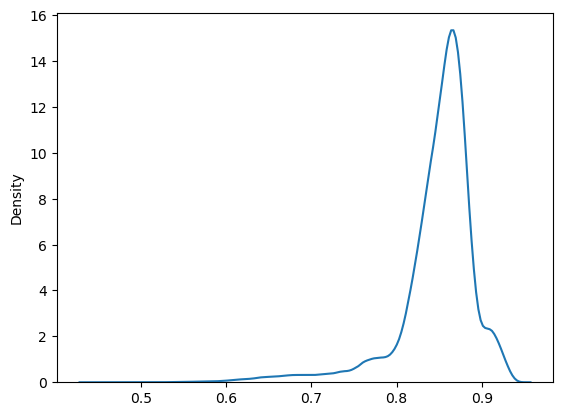

In [29]:
sns.histplot(comb_coverages, kde=True)

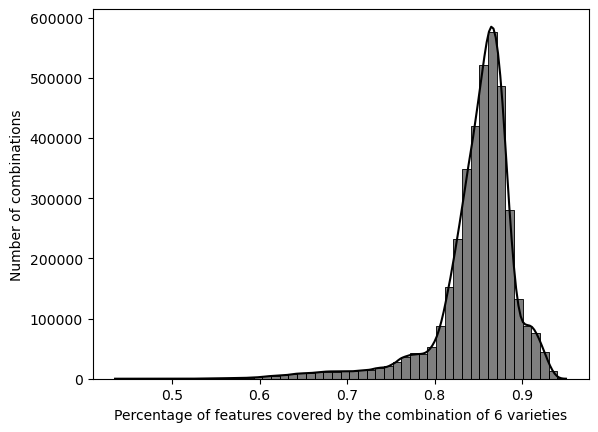

In [51]:
sns.histplot(comb_coverages, binwidth=0.01, kde=True, color='black')
plt.xlabel('Percentage of features covered by the combination of 6 varieties')
plt.ylabel('Number of combinations')    
plt.savefig('Data/cap_manu/output/comb_coverage.svg', facecolor='w')


228,833 combinations 90 % or more
only one combination with 95% or more
15807 combinations for 93% or more